In [1]:
#Task-1: Predict the percentage of an student based on the no. of study hours

In [2]:
###Linear Regression with Python Scikit Learn
######In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions.

In [3]:
####Simple Linear Regression
######In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics

In [5]:
dataset = pd.read_csv("http://bit.ly/w-data")
print("Data imported successfully")
dataset

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
# Check if there any null value in the Dataset
dataset.isnull == True

False

In [7]:
######it doesnt contain any null values.

In [8]:
#####Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

In [9]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
dataset.shape

(25, 2)

In [11]:
X = dataset.iloc[:, :-1].values
#print(X)
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [12]:
Y = dataset.iloc[:,1].values
#print(Y)
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

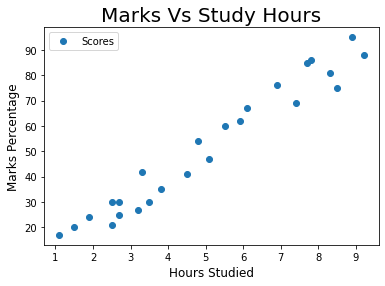

In [13]:
dataset.plot(x='Hours',y='Scores',style='o')
plt.title('Marks Vs Study Hours',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

In [14]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()
print(dataset.corr())

NameError: name 'regressor' is not defined

In [ ]:
####It is confirmed that the variables are positively correlated.

In [15]:
##Training the Model

In [16]:
###1) Splitting the Data

In [17]:
# Defining X and y from the Data
X = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, 1].values

# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

In [18]:
###2) Fitting the Data into the model

In [19]:
regression = LinearRegression()
regression.fit(train_X, train_y)
print("---------Model Trained---------")

---------Model Trained---------


In [20]:
##Predicting the Percentage of Marks

In [21]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


In [22]:
##Comparing the Predicted Marks with the Actual Marks

In [23]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


In [24]:
##Visually Comparing the Predicted Marks with the Actual Marks

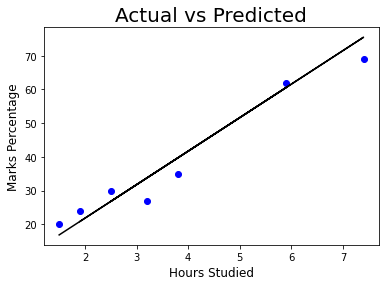

In [25]:
plt.scatter(x=val_X, y=val_y, color='blue')
plt.plot(val_X, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

In [26]:
##Evaluating the Model

In [32]:
# Calculating the accuracy of the model
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(val_y, pred_y))

Mean Absolute Error: 4.130879918502486


In [33]:
##What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [34]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


In [35]:
#According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.